#### Setup

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
import sys
from datetime import datetime
from pathlib import Path

In [2]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.__version__

'1.9.0'

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9243951216816422671
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 130043904
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11202926474126228297
physical_device_desc: "device: 0, name: NVIDIA Tegra X2, pci bus id: 0000:00:00.0, compute capability: 6.2"
]


In [4]:
img_folder = '../data/output_images/'

train_folder = '../data/output_images/train/'
test_folder = '../data/output_images/test/'
validation_folder = '../data/output_images/validation/'

sample_size = .1

img_size = (320,320)

In [5]:
def GetABSPath(folder):
    return os.path.abspath(folder)

In [30]:
def preprocess_image(img_raw):
    
    img_tensor = tf.image.decode_image(img_raw)
    
    img_final = tf.image.resize_images(
        img_tensor,
        [192, 192],
        align_corners=False,
        preserve_aspect_ratio=False,
        name=None
    )
    img_final /= 255.0  # normalize to [0,1] range

    return img_final

In [18]:
def load_and_preprocess_image(img_path):
    img_raw = tf.read_file(img_path)
    return preprocess_image(img_raw)

### Loading images into tf

['/media/nvidia/Mercyhurst/wabtec/rail_classification/data/output_images/train/1/1.png', '/media/nvidia/Mercyhurst/wabtec/rail_classification/data/output_images/train/1/2.png']


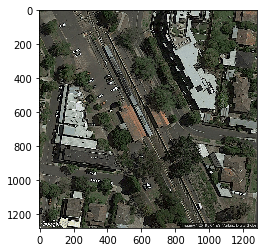

In [33]:
# Get filename and preview

p1 = GetABSPath(train_folder)+'/1/1.png'
p2 = GetABSPath(train_folder)+'/1/2.png'
img_path = [p1,p2]


plt.imshow(Image.open(img_path[0]))

print(img_path)

In [31]:
img = load_and_preprocess_image(img_path)

TypeError: resize_images() got an unexpected keyword argument 'preserve_aspect_ratio'

In [ ]:
plt.imshow(load_and_preprocess_image(img_path))

In [ ]:
img_final = tf.image.resize_images(
    img_tensor,
    [192, 192],
    align_corners=False,
    preserve_aspect_ratio=False,
)

### Build tf dataset

In [ ]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

### Create Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size = 0.20, random_state=42)

X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
len(X_test)

In [ ]:
with tf.device('/gpu:0'):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(32, activation=tf.nn.relu),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(10, activation=tf.nn.sigmoid)
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=5)

    model.evaluate(X_test, y_test)

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '../data/output_images/train/',
        target_size=(66, 66),
        batch_size=32,
        class_mode='binary')

# validation_generator = test_datagen.flow_from_directory(
#         '../data/output_images/test',
#         target_size=(20, 20),
#         batch_size=32,
#         class_mode='binary')


# model = tf.keras.models.Sequential([
#         tf.keras.layers.Dense(32, activation=tf.nn.relu),
#         tf.keras.layers.Dropout(0.2),
#         tf.keras.layers.Flatten(input_shape=(28,28)),
#         tf.keras.layers.Dense(10, activation=tf.nn.sigmoid)
#     ])

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# model.fit_generator(
#         train_generator,
#         steps_per_epoch=2000,
#         epochs=50,
#         validation_data=validation_generator,
#         validation_steps=800)

In [ ]:
with tf.device('/gpu:0'):
    
    X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size = 0.20, random_state=42)

    X_train, X_test = X_train / 255.0, X_test / 255.0
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(32, activation=tf.nn.relu),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(10, activation=tf.nn.sigmoid)
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=5)

    model.evaluate(X_test, y_test)

### Basic Example

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
x_train.shape

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)